# AccelerateAI : Data Science Bootcamp

## EDA - Handle Missing Values

There are different methods to solve missing values

1. Deletions - Listwise, Pairwise deletions etc
2. Imputations - Statistical, ML based, Time series data wise
3. Model based - Gaussian Mixture models etc

We will not go through all methods here.

We will pick up few approaches such as kNN impuation, MICE etc. Additionally, this notebook looks at how to drop missing values, fill missing values, replace with some values, interpolate etc.

We can use ```missingno``` library, ```sklearn``` library to handle missing values. There could be many others as well which is not scope of this notebook.

## 1. Import libraries and sample dataset

In [1]:
#!pip install pycaret 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./RetailMartSales_train.csv")

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.isnull().sum().sum()

3873

## 2. Drop missing values

Listwise deletion is not preferred if the size of the dataset is small as it removes entire rows if we eliminate rows with missing data then the dataset becomes very short and the machine learning model will not give good outcomes on a small dataset.

### 2.1 Drop all missing values

In [6]:
df.shape

(8523, 12)

In [7]:
df_drop = df.dropna()

In [8]:
df_drop.isnull().sum().sum()

0

In [9]:
df.isnull().sum().sum()

3873

In [10]:
df_drop.shape

(4650, 12)

### 2.2 Drop based on certain criteria

In [11]:
df_drop_criteria = df.dropna(how='any')

In [12]:
df_drop_criteria.isnull().sum().sum()

0

In [13]:
df.isnull().sum().sum()

3873

In [14]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [15]:
df_drop_criteria.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530


## 3. Fill missing values

Different ways of filling missing values:

### 3.1 Filling missing values with 0

In [16]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [17]:
df_fill = df.fillna(value=5)

In [18]:
df_fill.isnull().sum().sum()

0

In [19]:
df.isnull().sum().sum()

3873

In [20]:
df_fill.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,5,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,5.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### 3.2 Filling missing values with previous values

In [21]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [22]:
df_fill_prev = df.fillna(method='pad')

In [23]:
df_fill_prev.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,13.650,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [24]:
df_fill_prev.isnull().sum().sum()

0

### 3.3 Filling missing values with next values

In [25]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [26]:
df_fill_next = df.fillna(method='bfill')

In [27]:
df_fill_next.isnull().sum().sum()

0

In [28]:
df_fill_next.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,16.200,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### 3.4 Filling missing values with previous values of column wise

In [29]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [30]:
df_fill_prev_col = df.fillna(method='pad', axis=1)

In [31]:
df_fill_prev_col.isnull().sum().sum()

0

In [32]:
df.isnull().sum().sum()

3873

In [33]:
df_fill_prev_col.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,1998,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
5,FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.609
6,FDO10,13.65,Regular,0.0127411,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.553
7,FDP10,FDP10,Low Fat,0.12747,Snack Foods,107.762,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76


### 3.5 Filling missing values with next values of column wise

In [34]:
df_fill_next_col = df.fillna(method='bfill', axis=1)

In [35]:
df_fill_next_col.isnull().sum().sum()

0

In [36]:
df_fill_next_col.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,Tier 3,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
5,FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.609
6,FDO10,13.65,Regular,0.0127411,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.553
7,FDP10,Low Fat,Low Fat,0.12747,Snack Foods,107.762,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76


### 3.6 Filling different missing values in different columns

In [37]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [38]:
df_fill_diffcols = df.fillna({'Item_Weight':777,'Outlet_Size':'Very High'})

In [39]:
df_fill_diffcols.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Very High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,777.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### 3.7 Filling missing values with the mean of the column

In [40]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [41]:
df_fill_mean = df.fillna(value=df['Item_Weight'].mean())

In [42]:
df_fill_mean.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,12.8576,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


## 4. Replace with certain values

In [43]:
import numpy as np
df_replace = df.replace(to_replace=np.nan,value=777)

In [44]:
df_replace.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,777,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,777.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [45]:
# We can use Replace to replace any value with the desired value

In [46]:
df_replace_any = df.replace(to_replace='Medium',value='Extra Medium')

In [47]:
df_replace_any.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Extra Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Extra Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Extra Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Extra Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Extra Medium,Tier 3,Supermarket Type3,4022.7636


## 5. Interpolate

**When to use:** 

* We can use Interpolation to find missing value with help of its neighbors. 
* When imputing missing values with average does not fit best, then we have to move to a different technique called Interpolation.

In most cases, Interpolation is used while working with time-series data because in time-series data we like to fill missing values with previous one or two values. For example, if we think of weather data or temperature data, we would always prefer to fill today’s temperature with the mean of the last 2 days, not with the mean of the month. We can also use Interpolation for calculating the moving averages.

### 5.1 Interpolation to fill missing data in series data

##### 5.11 Linear Interpolation

In [48]:
import pandas as pd
import numpy as np
a = pd.Series([1, 2, np.nan, 4, 5, 6, 7])

In [49]:
a.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

##### 5.12 Polynomial Interpolation

In [50]:
# In Polynomial Interpolation you need to specify an order. 
# It means that polynomial interpolation is filling missing values with the lowest possible degree 
# that passes through available data points. The polynomial Interpolation curve is like the trigonometric 
# sin curve or assumes it like a parabola shape. 

a = pd.Series([1, 2, np.nan, 4, 5, 6, 7])
a.interpolate(method="polynomial", order=2)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [51]:
# If you pass an order as 1 then the output will similar to linear because the polynomial of order 1 is linear.
a.interpolate(method="polynomial", order=1)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

##### 5.13 Interpolation through padding

In [52]:
# Interpolation with help of padding simply means filling missing values with the same value present above them in 
# the dataset. If the missing value is in the first row then this method will not work. While using this technique 
# you also need to specify the limit which means how many NaN values to fill.
# So, if you are working on a real-world project and want to fill missing values with previous values you have to 
# specify the limit as to the number of rows in the dataset.

a.interpolate(method="pad", limit=2)

0    1.0
1    2.0
2    2.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

### 5.2 Interpolation to fill missing data in pandas dataframe

##### 5.2.1 Linear Method

In [53]:
import pandas as pd

df = pd.DataFrame({"A":[11, 4, 7, None, 2],
                   "B":[None, 3, 44, 2, None],
                   "C":[20, 15, None, 3, 8],
                   "D":[12, 3, None, None, 6]})

In [54]:
df

,A,B,C,D
0,11.0,NaN,20.0,12.0
1,4.0,3.0,15.0,3.0
2,7.0,44.0,NaN,NaN
3,NaN,2.0,3.0,NaN
4,2.0,NaN,8.0,6.0


In [55]:
# The linear method ignores the index and treats missing values as equally spaced and finds the best point 
# to fit the missing value after previous points. If the missing value is at first index then it will leave it as NaN. 

df.interpolate(method ='linear', limit_direction ='forward')

,A,B,C,D
0,11.0,NaN,20.0,12.0
1,4.0,3.0,15.0,3.0
2,7.0,44.0,9.0,4.0
3,4.5,2.0,3.0,5.0
4,2.0,2.0,8.0,6.0


In [56]:
# If you only want to perform interpolation in the single column then it is as follows:
df['C'].interpolate(method="linear")

0    20.0
1    15.0
2     9.0
3     3.0
4     8.0
Name: C, dtype: float64

##### 5.2.2 Backward Direction

In [57]:
# This method is the same, only the order in which we want to perform changes. 
# Now the method will work from the end of the dataframe or understand it as a bottom to top approach.

df.interpolate(method ='linear', limit_direction ='backward')

,A,B,C,D
0,11.0,3.0,20.0,12.0
1,4.0,3.0,15.0,3.0
2,7.0,44.0,9.0,4.0
3,4.5,2.0,3.0,5.0
4,2.0,NaN,8.0,6.0


##### 5.2.3 Interpolation through padding

In [58]:
# We have already seen that to use padding we have to specify the limit of NaN values to be filled. 
# We have a maximum of 2 NaN values in the dataframe so our limit will be 2.
df.interpolate(method="pad", limit=2)

,A,B,C,D
0,11.0,NaN,20.0,12.0
1,4.0,3.0,15.0,3.0
2,7.0,44.0,15.0,3.0
3,7.0,2.0,3.0,3.0
4,2.0,2.0,8.0,6.0


### 5.3 Filling missing values in time series data

In [59]:
df = pd.DataFrame({'Date': pd.date_range(start='2022-04-06', periods=10, freq='H'), 'Value':range(10)})
df.loc[2:3, 'Value'] = np.nan

In [60]:
df

,Date,Value
0,2022-04-06 00:00:00,0.0
1,2022-04-06 01:00:00,1.0
2,2022-04-06 02:00:00,NaN
3,2022-04-06 03:00:00,NaN
4,2022-04-06 04:00:00,4.0
5,2022-04-06 05:00:00,5.0
6,2022-04-06 06:00:00,6.0
7,2022-04-06 07:00:00,7.0
8,2022-04-06 08:00:00,8.0
9,2022-04-06 09:00:00,9.0


In [61]:
df['Value'].interpolate(method="linear")

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
Name: Value, dtype: float64

In [62]:
df.set_index('Date')['Value'].interpolate(method="linear")

Date
2022-04-06 00:00:00    0.0
2022-04-06 01:00:00    1.0
2022-04-06 02:00:00    2.0
2022-04-06 03:00:00    3.0
2022-04-06 04:00:00    4.0
2022-04-06 05:00:00    5.0
2022-04-06 06:00:00    6.0
2022-04-06 07:00:00    7.0
2022-04-06 08:00:00    8.0
2022-04-06 09:00:00    9.0
Name: Value, dtype: float64

In [63]:
df.set_index('Date')['Value'].fillna(method="backfill", axis=None)

Date
2022-04-06 00:00:00    0.0
2022-04-06 01:00:00    1.0
2022-04-06 02:00:00    4.0
2022-04-06 03:00:00    4.0
2022-04-06 04:00:00    4.0
2022-04-06 05:00:00    5.0
2022-04-06 06:00:00    6.0
2022-04-06 07:00:00    7.0
2022-04-06 08:00:00    8.0
2022-04-06 09:00:00    9.0
Name: Value, dtype: float64

## 6. Using "missingno" library

In [64]:
df = pd.read_csv("./RetailMartSales_train.csv")

df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2928,FDX28,NaN,Low Fat,0.000000,Frozen Foods,100.7042,OUT027,1985,Medium,Tier 3,Supermarket Type3,3174.5344
6032,NCP06,20.70,Low Fat,0.039246,Household,151.4366,OUT046,1997,Small,Tier 1,Supermarket Type1,1511.3660
7433,FDW57,8.31,Regular,0.000000,Snack Foods,177.4028,OUT046,1997,Small,Tier 1,Supermarket Type1,3896.2616
1352,FDL46,20.35,Low Fat,0.054057,Snack Foods,116.8466,OUT046,1997,Small,Tier 1,Supermarket Type1,2356.9320


In [65]:
mis_val = df.isna().sum()
mis_val_per = df.isna().sum()/len(df)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Outlet_Size,2410.0,28.3
Item_Weight,1463.0,17.2
Item_Identifier,NaN,NaN
Item_Fat_Content,NaN,NaN
Item_Visibility,NaN,NaN
Item_Type,NaN,NaN
Item_MRP,NaN,NaN
Outlet_Identifier,NaN,NaN
Outlet_Establishment_Year,NaN,NaN
Outlet_Location_Type,NaN,NaN


In [66]:
import missingno as msno

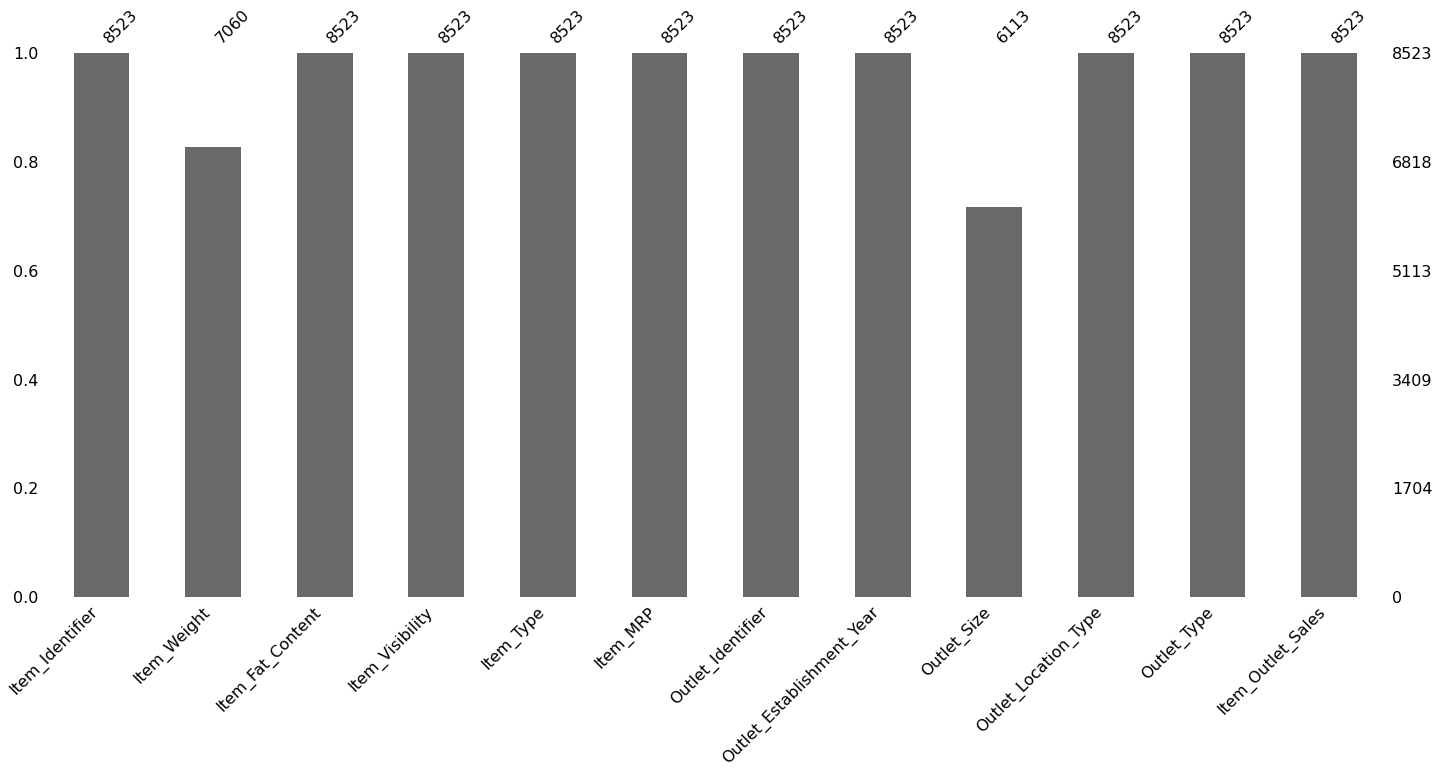

In [67]:
plt.figure(figsize=(6,4))
msno.bar(df)
plt.show()

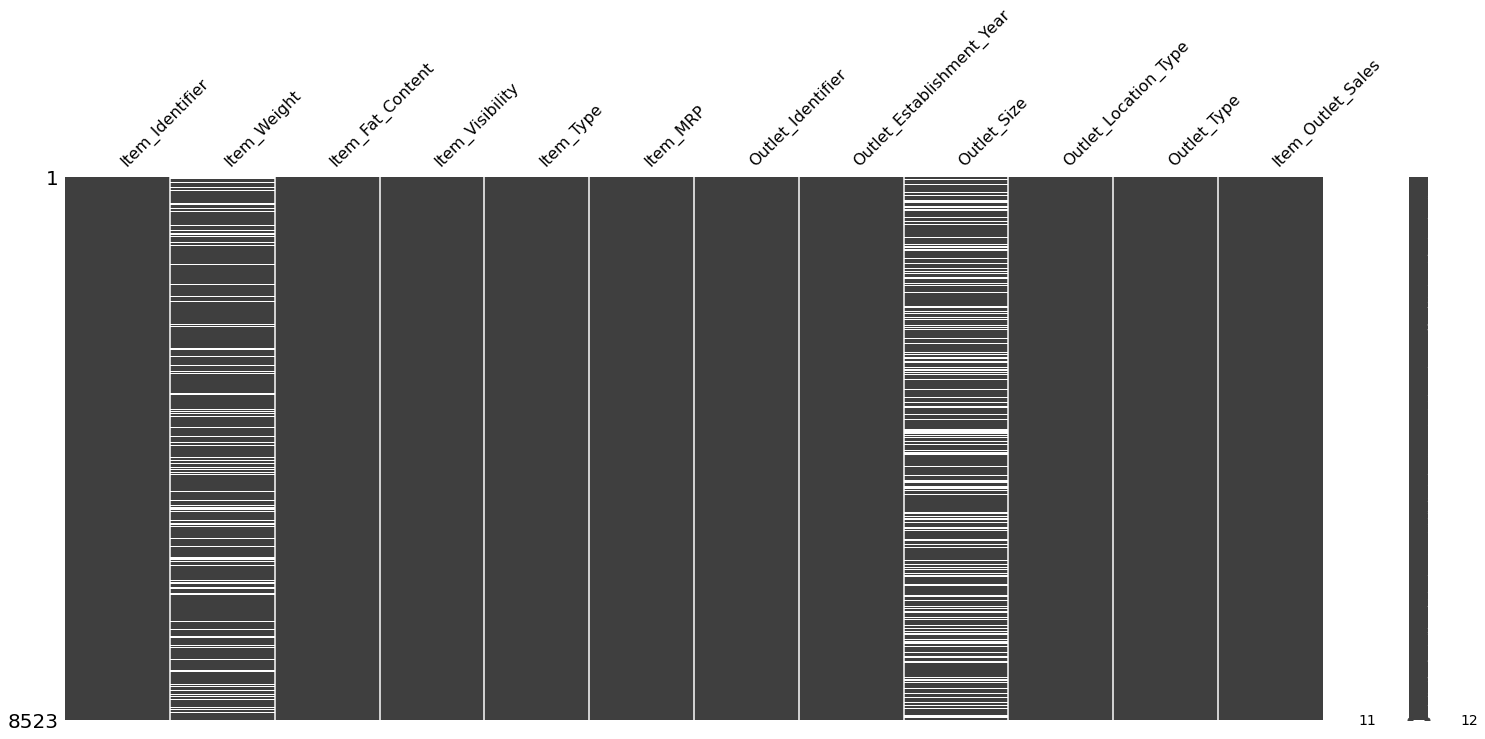

In [68]:
msno.matrix(df)
plt.show()

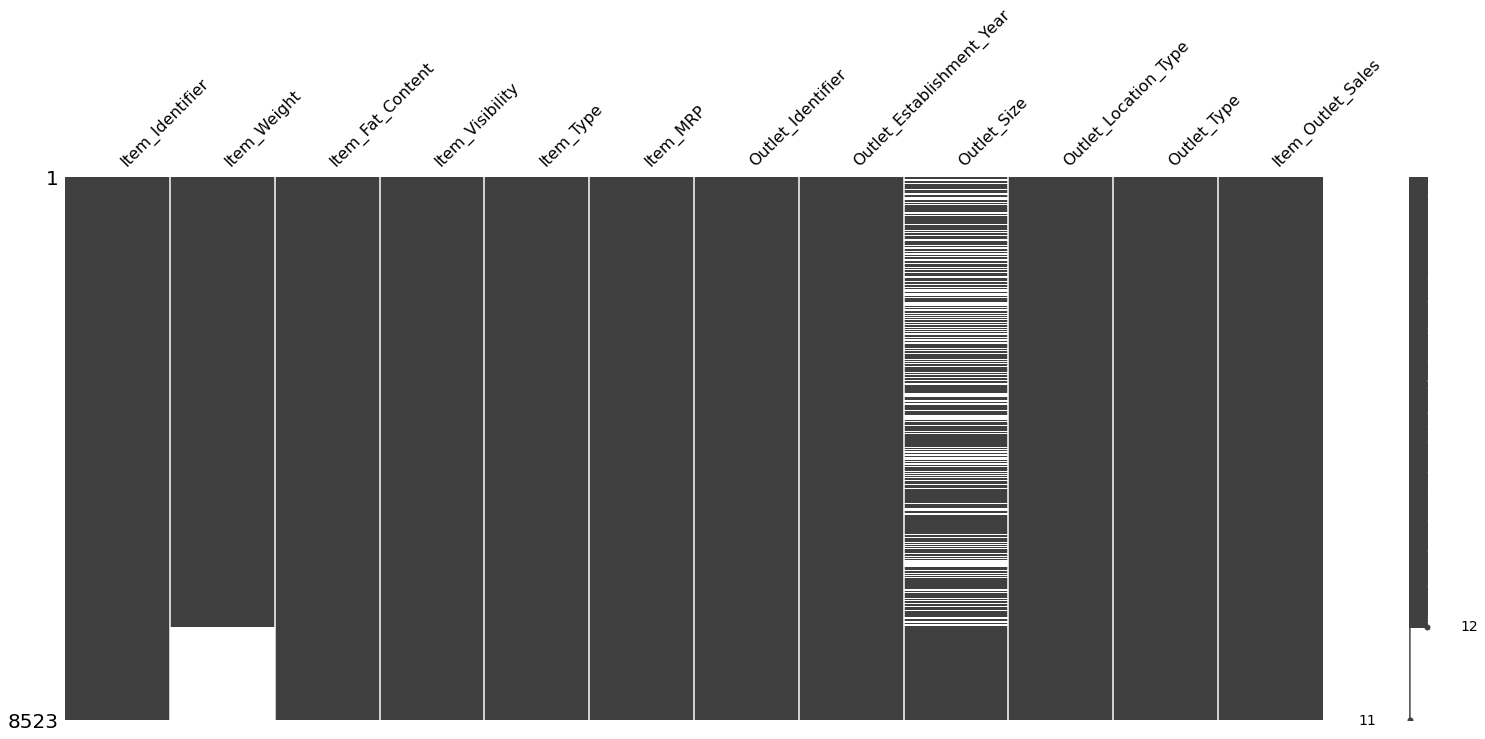

In [69]:
sorted = df.sort_values('Item_Weight')
msno.matrix(sorted)
plt.show()

<Figure size 432x288 with 0 Axes>

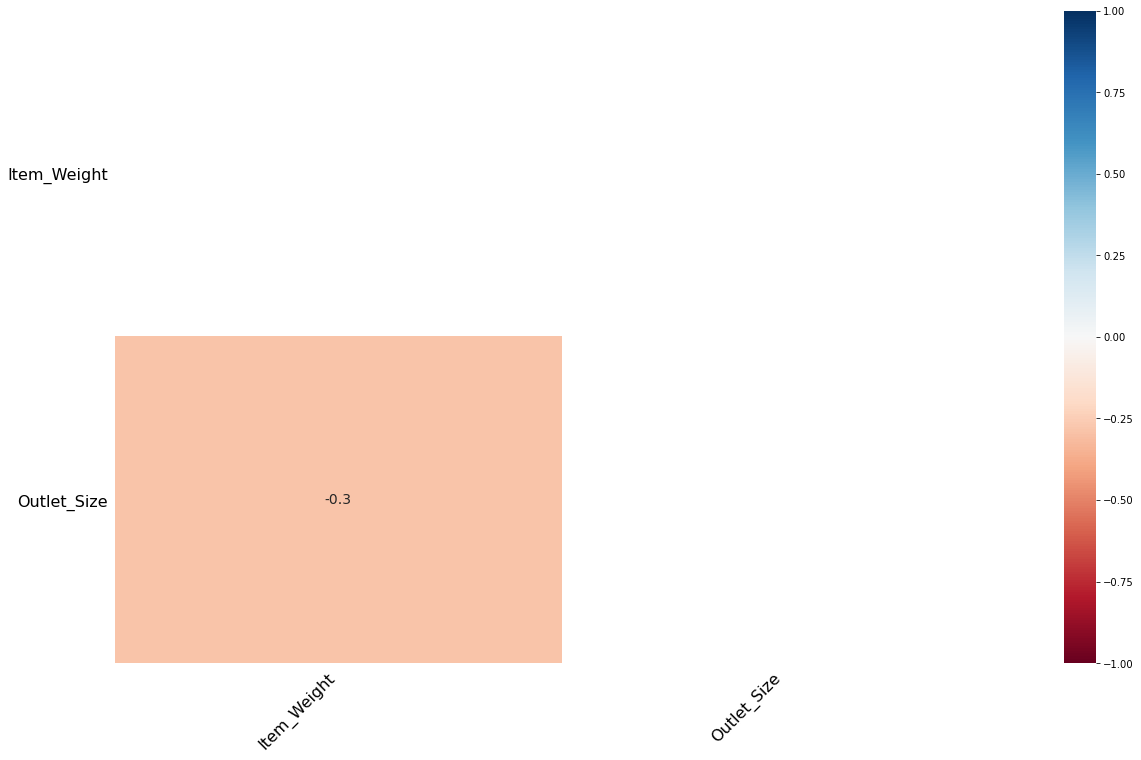

In [70]:
plt.figure(figsize=(6,4))
msno.heatmap(df)
plt.show()

In [71]:
# Listwise deletion is not preferred if the size of the dataset is small as it removes entire rows 
# if we eliminate rows with missing data then the dataset becomes very short and the machine learning model 
# will not give good outcomes on a small dataset.

df_new = df.copy()
df_new.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [72]:
df_new2 = df.copy()
df_new2['Item_Weight'].mean()

12.857645184136183

## 7. Imputation using sklearn library

### 7.1 Imputation with constant value

In [73]:
from sklearn.impute import SimpleImputer
df_constant = df.copy()

# Setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
df_constant.iloc[:,:] = mean_imputer.fit_transform(df_constant)
df_constant.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [74]:
df_constant.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing_value,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,missing_value,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### 7.2 Imputation with statistics

In [75]:
# df['Item_Weight'].dtype
# sns.distplot(df['Item_Weight'])
# plt.show()

In [76]:
from sklearn.impute import SimpleImputer
df_most_frequent = df.copy()

# Setting strategy to 'most_frequent' to impute by the most frequent values
mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median 
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)
df_most_frequent.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [77]:
df_most_frequent.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.150,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [78]:
from sklearn.impute import SimpleImputer

In [79]:
# Apply MICE

In [80]:
#!pip install fancyimpute

In [81]:
#from fancyimpute import IterativeImputer
#mice_imputer = IterativeImputer()
# filling the missing value with mice imputer
#df_test13 = mice_imputer.fit_transform(df_test)

## 8. kNN Imputation

* The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.
* Each missing feature is imputed using values from nearest neighbors that have a value for the feature. 
* The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [82]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()

In [83]:
df_kNN = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

df_kNN

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

In [84]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df_kNN)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## 9. MICE (Multiple Imputation by Chained Equation)

Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [85]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()

In [86]:
df_mice = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

In [87]:
df_mice

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

In [88]:
df_mice = mice_imputer.fit_transform(df_mice)

In [89]:
df_mice

array([[1.        , 2.        , 1.24390155],
       [3.        , 4.        , 3.        ],
       [5.50000483, 6.        , 5.        ],
       [8.        , 8.        , 7.        ]])

## Conclusion

That's all for now.

It is important to look at business context and apply appropriate methods to handle missing values. Please do practice on various techniques with sample datasets to understand better.